# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [30]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**I think that our Smartcab is not really smart enough.It stays in the same place throughout the simulation,so,the smartcab state will never be changed and updated since there is no action. In the environment, we see a bunch of other cars in the traffic lanes and traffic lights controlling the flow of the cars through each intersection. Our smartcab stationed in front of a traffic light sees rewards/punishments based on the traffic light color and occurence of incoming traffic:

Red: Some reward for idling(detecting) at a red light.
Green with incoming traffic: Minor reward for staying safe and avoiding a possible collision.
Green with no incoming traffic: Some punishment for not progressing towards the goal.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**Flags in agent.py:

num_dummies: the discrete number of dummy agents in the environment, default is 100
alpha: the continuous value for the learning rate for the driving agent, default is 0.5
enforce_deadline: a flag set to True to enforce a deadline metric
In environment.py, the function act() is called to consider an action and perform it if it's legal.

In simulator.py, the function render_text() is the non-GUI render display of the simulation. The function render() is a GUI render display of the simulation.

In planner.py, the next_waypoint() function calculates the difference from the current position and the goal, and considers East-West direction before considering North-South in determining which action to take.



-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


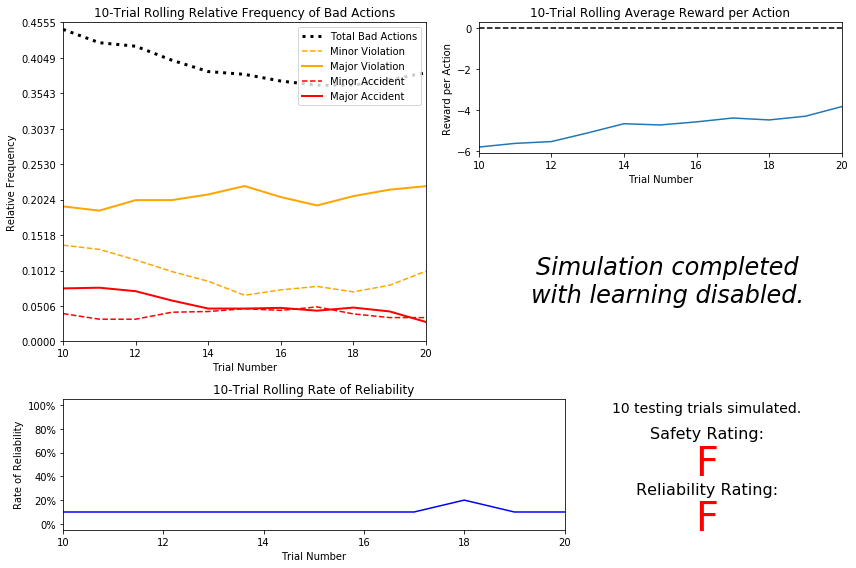

In [31]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- The driving agent is terrible at making decisions, making bad decisions about 41% of the time and getting into accidents about 8% of the time.
- Viewing the first chart in the top right corner we can analyze all the bad actions taken by the agent. It's clear from the chart that the relative frequency for total bad actions was hovering around 0.3543. This trend stayed steady even as the trial number increased. We can also notice that all of the other catagories in this same chart stayed consistent without much improvement from trial to trial.
- As far as accidents go, the relative frequency seems to be hovering at about 0.0506 for this agent. It seems that major accidents happend at the beginning of the trials more so than at the end. The Rate of reliability chart makes perfect sense because the line stayed relatively flat just under 10%. This is expected as the Agent has not done any learning whats so ever, and the actions have been completely random. 
- The Agents reward chart shows that the trials only resulted in negative rewards for all the actions taken. There was also a slight uptick of negative rewards toward the end of the trial run. It suggests that the punishments to the Agent were penalized heavily. 
- All charts have the commonality of a consistent results regardless of the number of trials. More trials do not mean that the Agent will get better with this current approach. The final consensus shows that the Agent gets an F in safety as well as a F in Reliability. 
- I would have to conclude that it is not at all safe nor reliable for any passenger because there are too many instances of accidents as well as extremeley low liability percentages so a customer is better off not using it. Based on the data above about 25% of the accidents are caused by bad decisions of the Agent.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**all the features except the input right seem to be relevant here, i have chosen to classify qualitatively according to how much impact on safety and efficiency each feature:

safety: To ensure safety it is essential for the car to learn the traffic rules of the grid world.

light : the color of the light determines whether the agent should move or not, if it moves when the light is red, this would be very hazardous to the other drivers, thus light is a very strong feature for safety.
left: this feature is only important if the vehicle wants to take the decision to turn left, if the vehicle is moving right, this may not affect the safety of the decision. this information is also important for learning the rule of being allowed to take a left turn when there is a red light.

oncoming: this feature is important because the oncoming traffic should not intersect with the direction of travel of the vehicle, which would lead to a major accident. it is also important to know this value to learn the rule of being able to take a left turn on a green light, since left turn is not allowed if the oncoming traffic is moving to the right.

Taking the 3 features from above we should achieve a very safe driver, but it would be quite inefficient.

efficiency:

All the features mentioned above will impact the efficiency of the vehicle, waypoint and deadline would be the main ones, because if the vehicle doesnt choose decisions which is likely to get to the destination fastest, it would not be very efficient. the input factors like light, left, right and oncoming would affect the usefulness of the decision in achieving long term efficiency, taking a route which has many oncoming traffic and vehicles is likely to be less efficient than going around a longer route without traffic, just like the real world.

The input right rule is not essential for the car to know, since it does not play a role in the rules of the grid world traffic and is not very essential for efficiency.

That said, i would say light and oncoming are the most important features for safety and waypoint, light are the most important features for reliability. I have chosen to make those 3 features available to the agent. I have chosen to ignore the inputs[left] and the deadline feature, because:

while the learning the left side rule in traffic has a beneficial efficiency for the agent, it could learn to just stay idle. discarding the left side input cuts down the number of states required to represent and doesnt necessarily create a large disadvantage.
While the deadline metric is important for the learner to get to the destination with least amount of time reliably, the reliability and safety score of the journey stays unaffected, using the deadline metric adds a very large number of state spaces to explore and this may be quite difficult to learn, i chose to ignore the deadline because with it the agent is unlikely to learn generalized rules of the traffic since the large number of states would mainly have 0 in the Q values after 20 trials of training.



### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**if a state is defined using the features i've identified as important from the environment data

light : is going to have 2 possible values - red, green
left : will have 4 possible values - None, left, right, forward
right : will have 4 possible values - None, left, right, forward,
oncoming: will have 4 possible values - None, left, right, forward,
waypoint: will have 3 possible values - left, right, forward,
deadline: discrete values between 0 and distance 5 ( number of intersections 5 time steps per intersection)
for a given grid of size 8 * 6 as defined the default grid, the maximum deadline would be 10 * 5 = 50 The total number of possible states with all the features avaialable would be :

2 * 4 * 4 * 4 * 3 * 50 = 19200 states.

As we are trying 20 trials before testing, it seems very unlikely that the agent can reliably get information for all the possible states.

Infact,To make the state space smaller I have decided to use only the following features: light, oncoming and waypoint as discussed previously.

This results in 2 * 4 * 3 = 24 possible states. I think this is a decent number of states for the the learner to effictively calculate reasonable Q values



### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

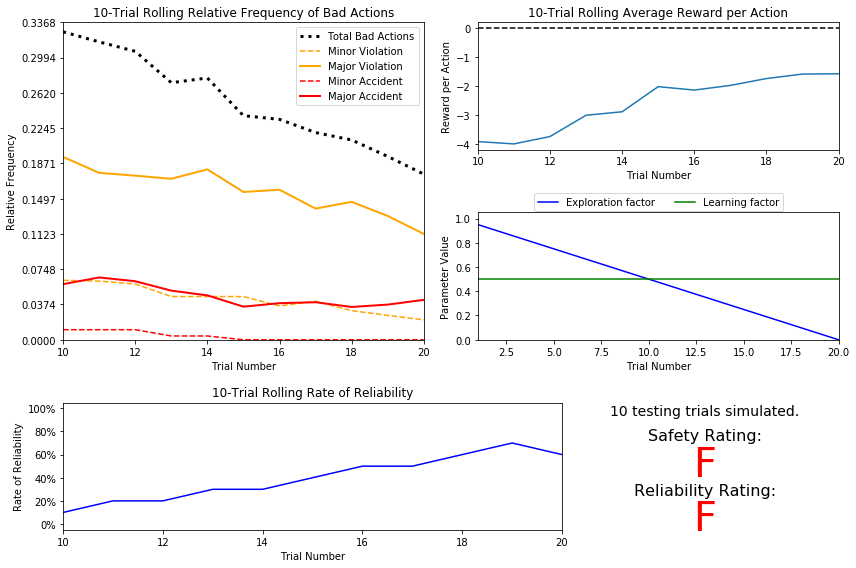

In [32]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**When comparing the basic driving agent and the default Q-learning agent, the overall rating is the same - achieving an F for safety and an F for reliability. At first glance, this might suggest that the Q-Learning model is not improved at all.

- 0.05=1-0.05t ,thust=19+(trail0)=20
- There are similar observations between the basic driving agent and the default Q learning Agent. Both of them failed in both safety and reliability rating. There were about 20 training trials before the sim-default-learning Agent utilized before it started testing as well as the sim_no_learning Agent. Both agents utilized an epsilon of 1.0. Whats also interesting is both agents had one successful training trial, and one successful test trial. The rest of the trials were failed. The Agent required twenty training trials before testing The decaying function represented shows a even decline in chart number 4. Because each trial we subtracted 0.05 from the current epsilon, by the time we reached twenty trials we had reached an epsilon of 0. Total bad accidents seemed to decrease around trial 18. So this indicates that the Agent definately had a lower number of Bad actions as more trials went on. The Average reward also began to increase right at 18 trials as well. Both Agents had a F for safety and reliability so there was no major difference here.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

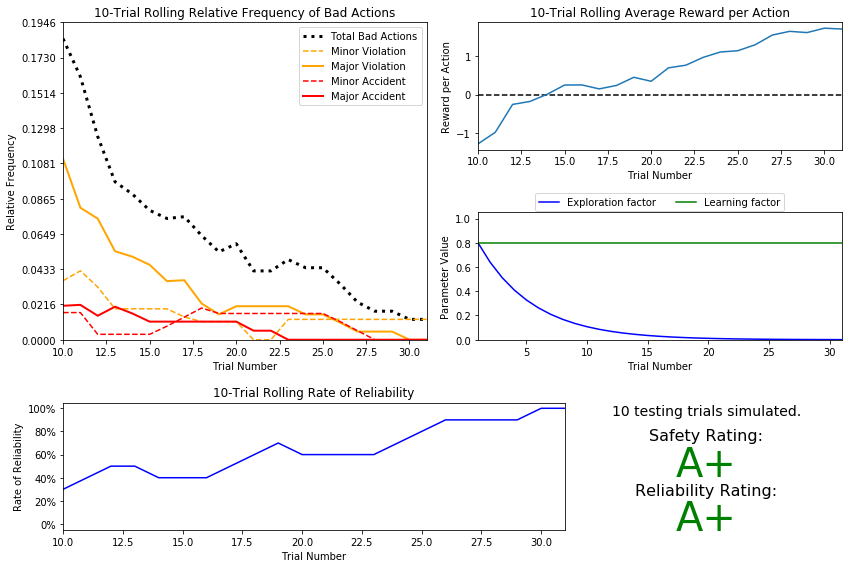

In [33]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**I used a simple exponential decaying function for epsilon: epsilon=a^t for 0<a<1
                                                                This took approximately 31 trials to before testing since with a learning rate alpha of 0.8 and a epsilon tolerance 0.001, you get: epsilon = 0.8^{t}  which results in  {t} = log _{0.8} .001 = 30.9566 . I wanted to use a more aggressive learning rate but still run enough learning trials before testing, so I increased the learning rate a bit and reduced the $\epsilon$ tolerance significantly to account for the decay exponential function.

This exponentially decaying Q-learner made significant progress over the previous linearly decaying one. The overall frequency of bad actions reduced to about ~3% of the time versus ~9% of the time. The average reward per action approached ~1.3 compared to ~-1 in the linearly decaying Q-learner. The rate of reliability approached ~80% similar to the linear Q-learner.

This results in a A+ safety and a A+ reliability rating, compared to the linear Q-learner's F safety and F reliability rating. we can observe significant reliability and safety improvements. I can say the Q-learner results show that the driving agent successfully learned an appropriate policy for this environment. I an pretty satisfied with tmy ratings.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** the state space i defined is of the form (waypoint, light, oncoming) the expected optimal policy for the algorithm should have a few essential features:

any movement in a red light state should have the largest negative penalty. This would mean the agent has learnt the most basic traffic rule.

eg. the agent in a state (forward, 'red', forward) shoud have None as the max Q action.

since we ignored the state of left, the agent will not have reliably learnt the right turn rule of the traffic, where it is allowed to take right on a red light if there is no oncoming traffic from the left side.

eg. the agent in state (right, 'red' , forward) and (right, 'red', 'left') should not have much difference and will likely just stay idle.

vice versa most of the states in the 'green' light should encourage movement, but certain conditions should be satisfied.

if the oncoming traffic is in a direction which will cause a collision, the action should be avoided.

eg. the agent in a state (forward, 'green', backward) should have the highest Q state in either left of right.

if the oncoming traffic is in the same direction as the waypoint, the waypoint direction should be given preference.

eg. the agent in a state (forward, green, forward) should be ok with going forward, since it will not cause a collision and will get them closer to the destination

- the agent should however learn the left turn rule, where it is not allowed to turn left if the oncoming traffic is turning right.

eg. the agent in a state (left, green, right) should have a heavy penalty on the left action.
From inspecting 'sim_imporved-learning.txt', we can pull all the state-action rewards and show how well it's following my expected policy behavior



('forward', 'red', 'forward')
 -- forward : -9.33
 -- left : -32.15
 -- right : 0.00
 -- None : 2.16
this seems to be pretty correct for above mentioned reasons.
 
 ('forward', 'green', 'forward')
 -- forward : 1.84
 -- left : -19.02
 -- right : -0.15
 -- None : -4.50
this results are correct as mentioned above.

('right', 'red', 'left')
 -- forward : -8.63
 -- left : -33.37
 -- right : -15.10
 -- None : 0.39


 ('forward', 'red', None)
 -- forward : -32.71
 -- left : -10.26
 -- right : -2.73
 -- None : 1.15
 
 the results are correct enough.
 ('left', 'green', 'right')
 -- forward : 0.00
 -- left : -16.49
 -- right : 0.00
 -- None : 0.00
 the results are pretty correct as mentioned on above reasons.
 
 
 
 
 


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.